<img src="https://pbs.twimg.com/profile_images/1523691369763684357/FPimkdzj_400x400.jpg" align="right" style="float" width="200">
<font color="#0096d2"><h1 align="left">Datamecum: Programa técnico intensivo en data science.</h1></font>
<font color="#00628a"><h2 align="left">Módulo No supervisado</h2></font>
<font color="#00628a"><h2 align="left">Anomalías con Distancias</h2></font>

# 1) Distancias Lp

Dados unos datos, determinamos diferentes distancias entre ellos

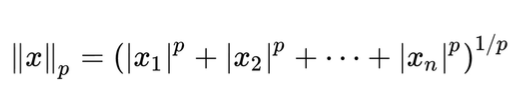

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos datos inventados
A = np.array([[1,2],[3,1],[-1,2]])
print(A)

[[ 1  2]
 [ 3  1]
 [-1  2]]


EJERCICIOS

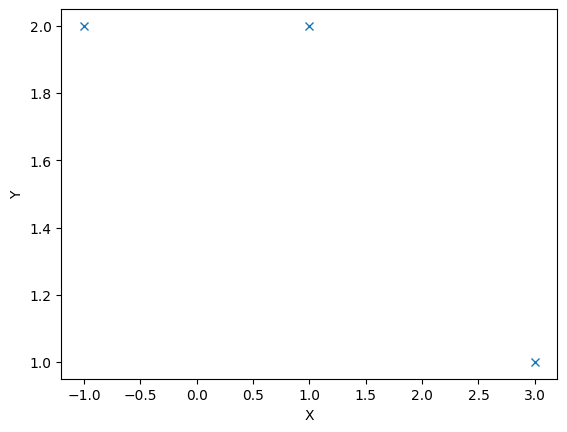

In [4]:
# Dibujamos los datos

plt.plot(A[:,0], A[:,1],'x')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
# Calculamos las distancias Lp, p=[0, 0'5, 1, 2, 3, inf] (respecto al cero)

p = [0.0000001, 0.5, 1, 2, 3, np.inf]

for i in p:
  distancia = (np.abs(A[:,0])**i+np.abs(A[:,1])**i)**(1/i)
  print(distancia)

[inf inf inf]
[5.82842712 7.46410162 5.82842712]
[3. 4. 3.]
[2.23606798 3.16227766 2.23606798]
[2.08008382 3.03658897 2.08008382]
[1. 1. 1.]


<ipython-input-6-4f8c9af2962b>:6: RuntimeWarning: overflow encountered in power
  distancia = (np.abs(A[:,0])**i+np.abs(A[:,1])**i)**(1/i)


In [7]:
# Repite entre un par de puntos

for i in p:
  distancia = (np.abs(A[0,0]-A[1,0])**i+np.abs(A[0,1]-A[1,1])**i)**(1/i)
  print(distancia)

inf
5.82842712474619
3.0
2.23606797749979
2.080083823051904
1.0


<ipython-input-7-da0b21db9e86>:4: RuntimeWarning: overflow encountered in double_scalars
  distancia = (np.abs(A[0,0]-A[1,0])**i+np.abs(A[0,1]-A[1,1])**i)**(1/i)


Analiza los resultados, ¿es esperable con respecto a lo teórico?

# 2) Distancias 1D

Generamos una variable x aleatoria de datos.

Predecimos una variable random y_hat para cada valor de x.

¿Cómo podemos saber qué valor y_hat predicho será el más anómalo?

In [8]:
N = 1000

# Valores originales
x = np.random.rand(N,1)

#Valores predichos (fake)
y_hat = x + 0.05*np.random.randn(x.shape[0],x.shape[1])

EJERCICIOS

Text(0, 0.5, 'Valores predichos')

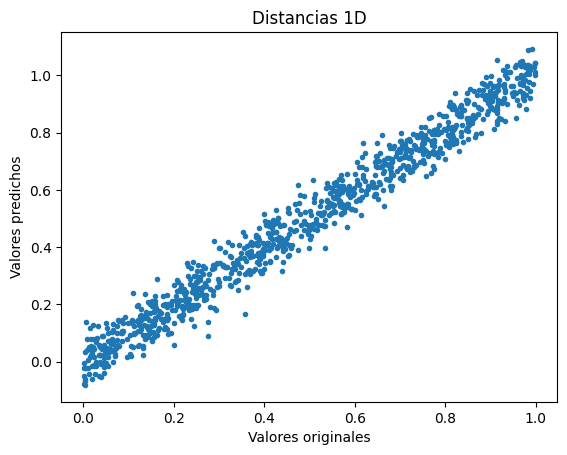

In [9]:
# Dibujamos los datos

plt.plot(x, y_hat, '.')
plt.title('Distancias 1D')
plt.xlabel('Valores originales')
plt.ylabel('Valores predichos')

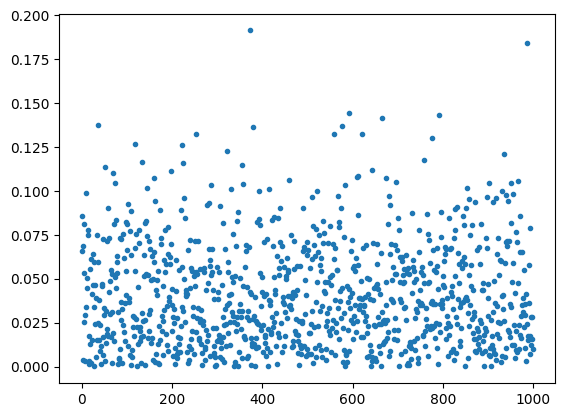

In [13]:
# Calcula las distancias Lp (p=[0, 0'5, 1, 2, 3, inf]) entre los valores reales
# y los predichos para distintas cantidades de ruido

distancia = (np.abs(x-y_hat))
plt.plot(distancia,'.')

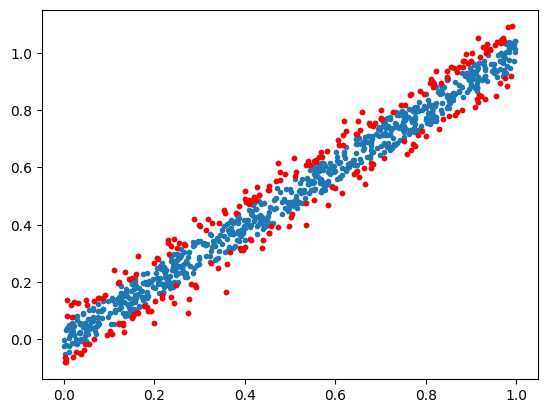

In [20]:
# Introduce un treshold para detectar anomalías (piensa que tipo de distribución pueden seguir los datos y su std)
threshold = 2*np.std(distancia)

# representa los puntos anómalos con otro color
an = distancia > threshold

plt.plot(x,y_hat,'.')
plt.plot(x[an], y_hat[an],'r.')
plt.show()

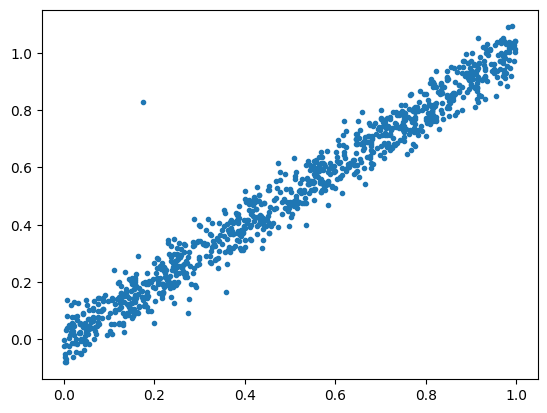

In [23]:
# Introduce algún dato anómalo (outlier) y mira como afecta
y_hat[5] = y_hat[5] + 0.3
plt.plot(x,y_hat,'.')
plt.show()

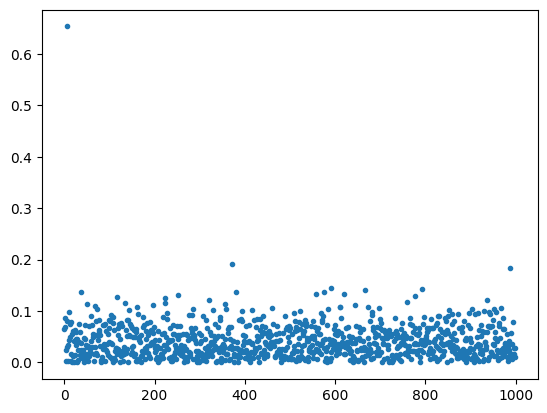

In [24]:
# podemos pintar las distancias

distancia = (np.abs(x-y_hat))
plt.plot(distancia,'.')

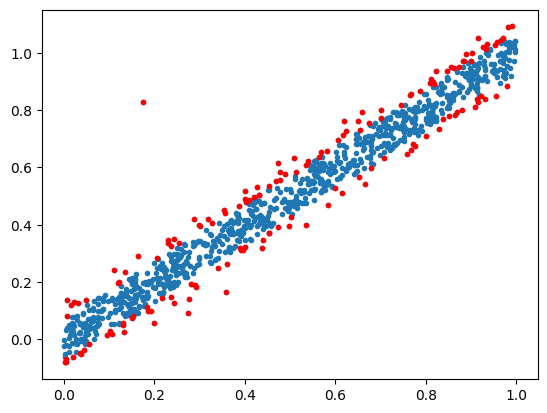

In [25]:
# en probabilidad se hace con histograma, ¿lo vemos?
threshold = 2*np.std(distancia)

# representa los puntos anómalos con otro color
an = distancia > threshold

plt.plot(x,y_hat,'.')
plt.plot(x[an], y_hat[an],'r.')
plt.show()


(array([192., 194., 168., 130., 112.,  92.,  49.,  30.,  16.,   5.,   8.,
          1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.64897530e-05, 1.31064280e-02, 2.61763662e-02, 3.92463044e-02,
        5.23162427e-02, 6.53861809e-02, 7.84561191e-02, 9.15260573e-02,
        1.04595996e-01, 1.17665934e-01, 1.30735872e-01, 1.43805810e-01,
        1.56875748e-01, 1.69945687e-01, 1.83015625e-01, 1.96085563e-01,
        2.09155501e-01, 2.22225440e-01, 2.35295378e-01, 2.48365316e-01,
        2.61435254e-01, 2.74505193e-01, 2.87575131e-01, 3.00645069e-01,
        3.13715007e-01, 3.26784945e-01, 3.39854884e-01, 3.52924822e-01,
        3.65994760e-01, 3.79064698e-01, 3.92134637e-01, 4.05204575e-01,
        4.18274513e-01, 4.31344451e-01, 4.44414389e-01, 4.57484328e-01,
        4.

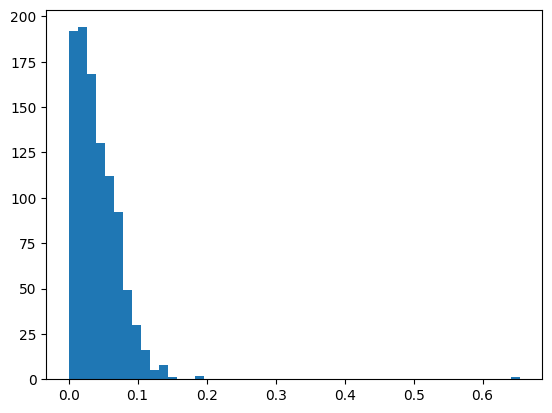

In [27]:
plt.hist(distancia,50)

# 3) Datos en 2D


En este caso tenemos dos variables de entrada, x e y.

Para cada valor x, y tenemos un valor y_hat predicho.

¿Cómo calculamos anomalías considerando dos dimensiones?

In [28]:
N = 1000

# Valores originales
x = 3*((np.random.rand(N,1))-0.5)
y = x**3

#Valores predichos (fake)
sigma = 0.2
y_hat = y + sigma*np.random.randn(y.shape[0],y.shape[1])

EJERCICIOS

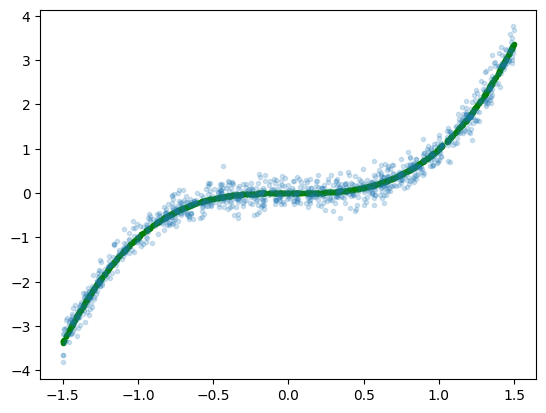

In [31]:
# representa los datos originales

plt.plot(x,y,'g.')
plt.plot(x,y_hat,'.', alpha = 0.2)
plt.show()

In [ ]:
# representa los datos predichos


In [38]:
# Calcula la distancia L2 entre cada punto 2D


D = np.zeros((N,N))  # matriz de distancias
d = np.zeros((N,))   # "matriz" para distancia del vecino
p = 2

for i in range(0,len(x)):
  D[i,:] = (np.abs(x[i]-x[:,0])**p+np.abs(y_hat[i]-y_hat[:,0])**p)**(1/p)
  aux = D[i,:]
  aux[i] = np.max(D[i,:])+1
  d[i] = np.min(aux)

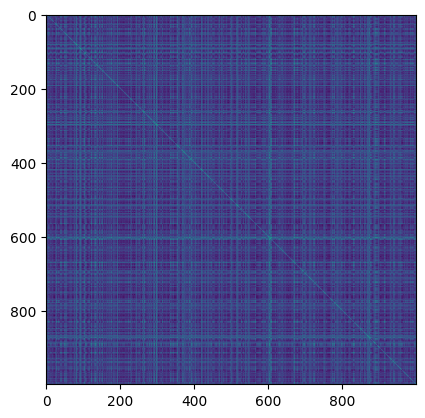

In [39]:
# representa las matrices de distancias
plt.imshow(D)

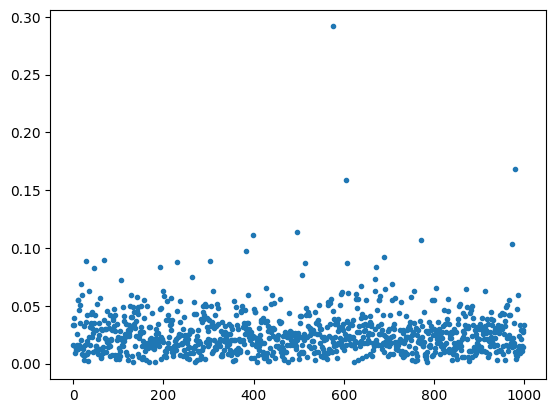

In [42]:
plt.plot(d,'.')

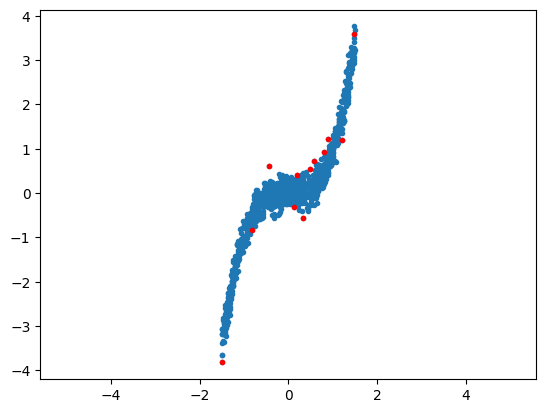

In [50]:
# determina un threshold y encuentra las anomalías
threshold = 4.5*np.std(d)

# representa los puntos anómalos con otro color
an = d > threshold

plt.plot(x,y_hat,'.')
plt.plot(x[an], y_hat[an],'r.')
plt.axis('equal')
plt.show()

In [ ]:
# Calcula las distancias Lp entre cada punto 2D.
# ¿Que punto tiene las mayores distancias para cada valor de p?



## 4) Distancias Lp

Intentamos representar la imagen de la diapositiva 15.

Para ello, nos tendremos que crear una malla de puntos y calcularemos distancias al centro.

In [ ]:
# Crea la malla de puntos cuadrada

# me defino un dominio
X = np.linspace(-2,2,50)
Y =   # quiero una x y una y iguales

# creo una combinación de todos los X y los Y
[XX,YY] =

# los convierto en vector para tener las coordenadas para cada uno de los puntos (los XXv.shape valores para las X)
XXv =  # investiga la función .flatten()
YYv =
print(XXv.shape)

In [ ]:
# representa la malla


In [ ]:
# Calcula las distancias Lp, p = 2 (p=[0, 0'5, 1, 2, 3, inf])



In [ ]:
# busco los puntos que distan del cero con distancia 1 (como hemos creado una malla, añade un threshold +-)



In [ ]:
# Prueba con diferentes p

